In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

df = pd.read_csv("marketing_campaign.csv", delimiter="\t")
df.sample(15)



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1434,3388,1967,Graduation,Divorced,70844.0,1,1,30-10-2013,16,129,...,7,0,0,0,0,0,0,3,11,0
647,3376,1970,Master,Divorced,55282.0,1,0,13-12-2013,9,125,...,4,0,0,0,0,0,0,3,11,0
525,2258,1986,Graduation,Married,32880.0,1,0,04-12-2012,76,8,...,8,0,0,0,0,0,0,3,11,0
2117,8659,1952,PhD,Together,69805.0,0,1,21-01-2014,50,750,...,2,0,0,0,0,0,0,3,11,0
1390,8216,1972,Master,Married,53761.0,1,1,11-10-2013,7,158,...,5,0,0,0,0,0,0,3,11,0
1148,7755,1954,PhD,Married,57744.0,0,1,12-11-2013,91,350,...,8,0,0,0,0,0,0,3,11,0
1468,7196,1950,PhD,Married,41145.0,1,1,08-02-2014,20,9,...,3,0,0,0,0,0,0,3,11,0
29,1966,1965,PhD,Married,84618.0,0,0,22-11-2013,96,684,...,2,0,0,1,0,0,0,3,11,0
2105,1407,1986,Basic,Married,20425.0,1,0,29-10-2012,5,4,...,7,0,0,0,0,0,0,3,11,0
296,2874,1988,2n Cycle,Divorced,35388.0,1,0,07-03-2013,20,6,...,7,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df[df.isnull().T.any()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [7]:
df.drop(["Z_CostContact", "Z_Revenue"], axis=1, inplace=True)

In [8]:
df.rename({"Year_Birth": "Age"}, axis=1, inplace=True)

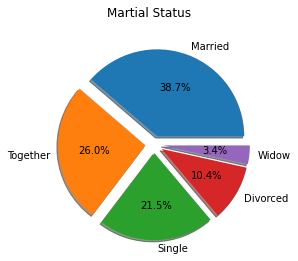

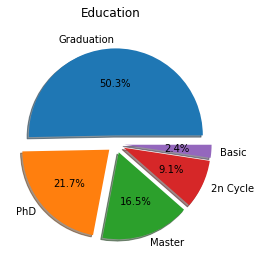

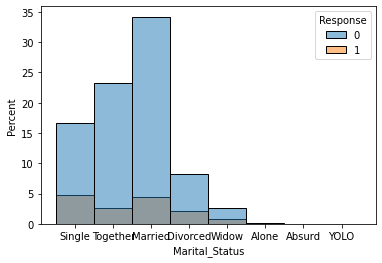

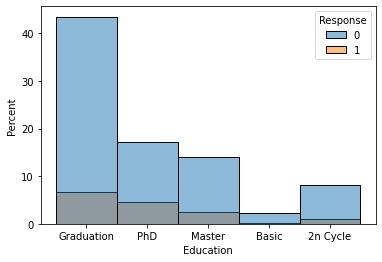

In [9]:
ms_df_c = df["Marital_Status"].value_counts().to_frame()
ms_df = ms_df_c[ms_df_c["Marital_Status"] > 50]
ed_df = df["Education"].value_counts().to_frame()

ms_df[ms_df["Marital_Status"] > 50].plot(
    kind="pie",
    autopct="%1.1f%%",
    legend=None,
    ylabel="",
    subplots=True,
    shadow=True,
    explode=(0.1, 0.1, 0.1, 0.1, 0.1),
    title="Martial Status",
)
plt.show()

ed_df.plot(
    kind="pie",
    autopct="%1.1f%%",
    legend=None,
    ylabel="",
    subplots=True,
    shadow=True,
    explode=(0.1, 0.1, 0.1, 0.1, 0.1),
    title="Education",
)
plt.show()

sns.histplot(data=df, x="Marital_Status", stat="percent", hue="Response")
plt.show()
sns.histplot(data=df, x="Education", stat="percent", hue="Response")
plt.show()

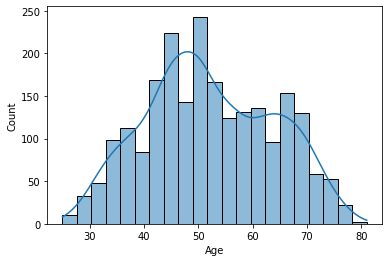

In [10]:
def calculate_age(born) -> int:
    return int(datetime.today().strftime("%Y")) - int(born)

df["Age"] = df["Age"].apply(calculate_age)
filtered_df = df[df["Age"] < 100]
sns.histplot(x=filtered_df["Age"], kde=True)
plt.show()

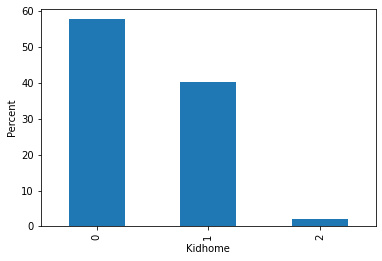

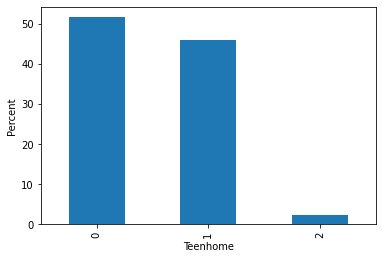

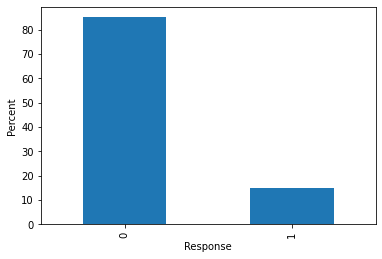

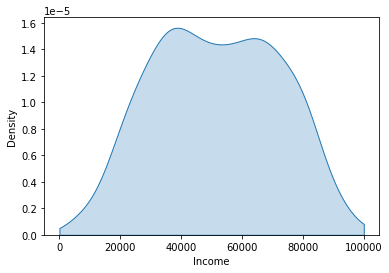

In [11]:
def show_hist(data_name: str) -> None:
    df[data_name].value_counts(normalize=True).mul(100).to_frame().plot(
        kind="bar",
        legend=None,
        xlabel=data_name,
        ylabel="Percent"
    )
    plt.show()
    
show_hist("Kidhome")
show_hist("Teenhome")
show_hist("Response")
sns.kdeplot(df["Income"], shade=True, clip=(10**0, 10**5))
plt.show()

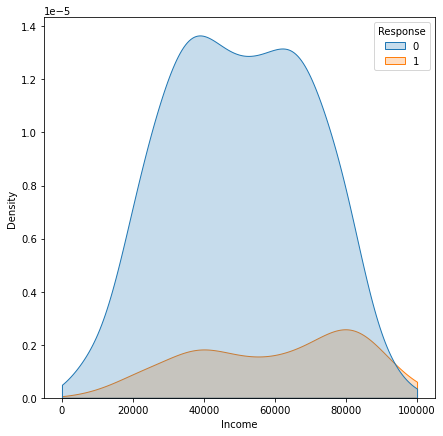

d:\pythonlabs\lab11\venv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


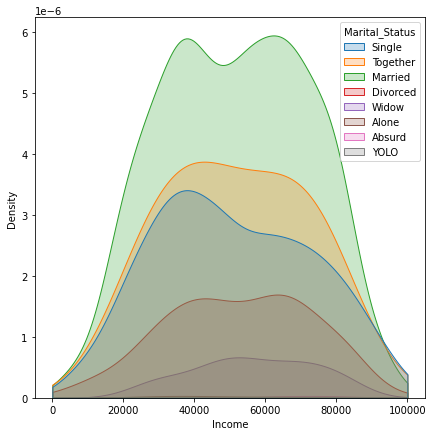

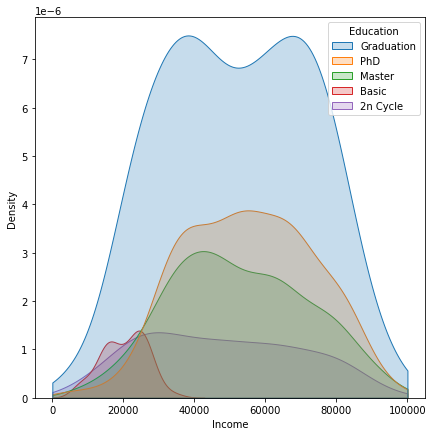

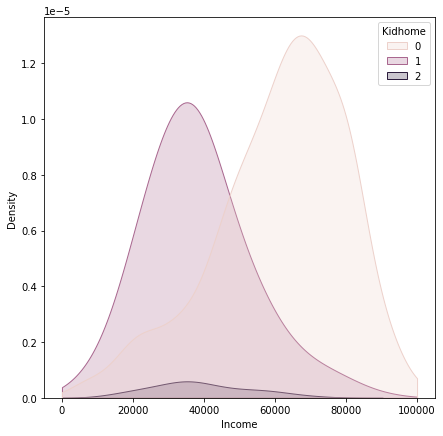

In [12]:
def show_kdeplot(hue: str, clip: tuple = (10**0, 10**5)):
    plt.figure(figsize = (7, 7))
    sns.kdeplot(data=df, x="Income", hue=hue, shade=True, clip=clip)
    plt.show()

show_kdeplot("Response")
show_kdeplot("Marital_Status")
show_kdeplot("Education")
show_kdeplot("Kidhome")
plt.show()

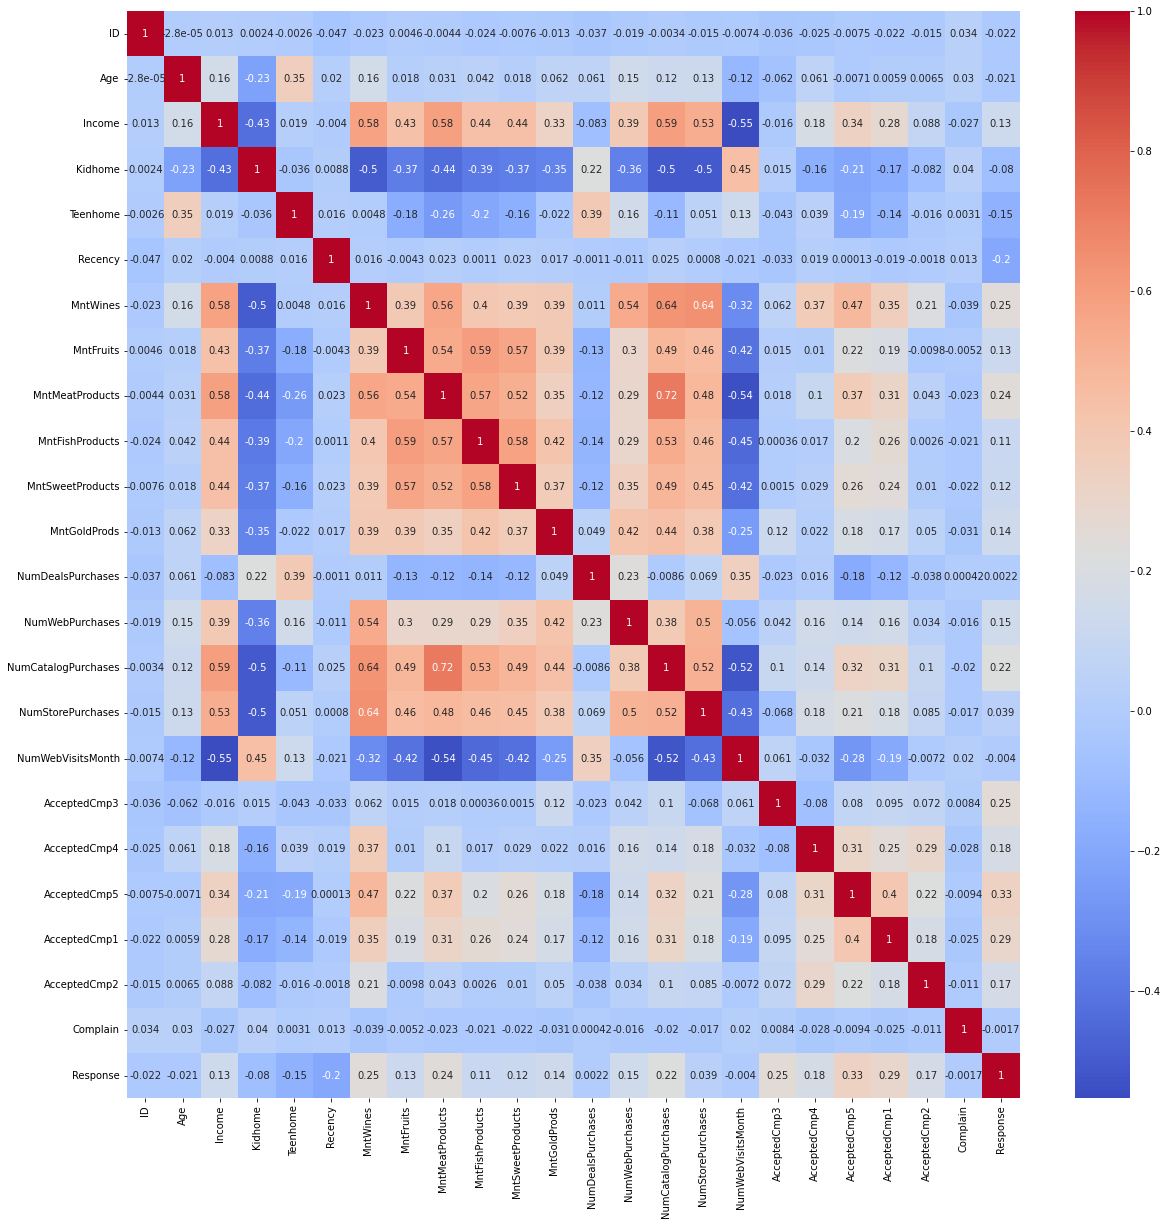

In [13]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
newdf = df.select_dtypes(include=numerics)
plt.figure(figsize=(20, 20))
sns.heatmap(newdf.corr(), cmap="coolwarm", annot=True)
plt.show()
